# Support Vector Machine (SVM) Model

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Importing the Dataset

In [2]:
dataset = pd.read_csv('./dataset/clean_iris.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Creating Feature and Label Arrays

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(len(X))
print(len(y))

150
150


## Encoding the Dependent Variable (Species)

In [5]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [6]:
class_mapping = {index: label for index, label in enumerate(encoder.classes_)}
print("Class mapping:", class_mapping)

Class mapping: {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


## Splitting the Dataset into Training and Test Sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
print((len(X_train), len(y_train)), (len(X_test), len(y_test)))

(112, 112) (38, 38)


## Feature Scaling

In [9]:
scaler = StandardScaler() # StandardScaler instance
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training the SVM Model on the Training Set

In [10]:
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)

SVC()

## Evaluating the Model

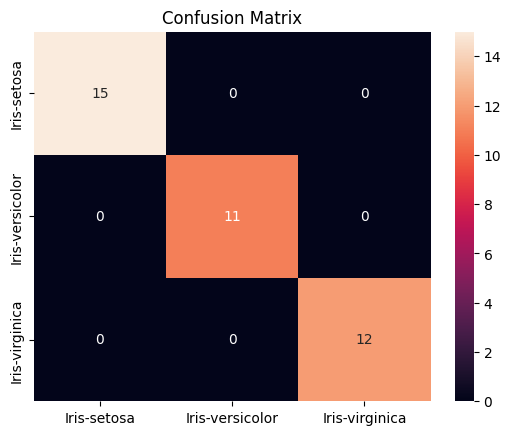

In [11]:
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] # Tick labels for the confusion matrix
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, classifier.predict(X_test)), annot=True, xticklabels=labels, yticklabels=labels)
plt.show()

In [12]:
# Evaluating the accuracy of the model
print('Accuracy: {}'.format(accuracy_score(y_test, classifier.predict(X_test))))

Accuracy: 1.0


In [13]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

